# Importing Library

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import linear_model
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Importing Data

In [5]:
df=pd.read_csv(r"C:\Users\Aryaa Ishika\Downloads\archive\Mall_Customers.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploring Data

In [8]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Distribution of Factors

Text(13.819444444444445, 0.5, 'Density')

<Figure size 800x400 with 0 Axes>

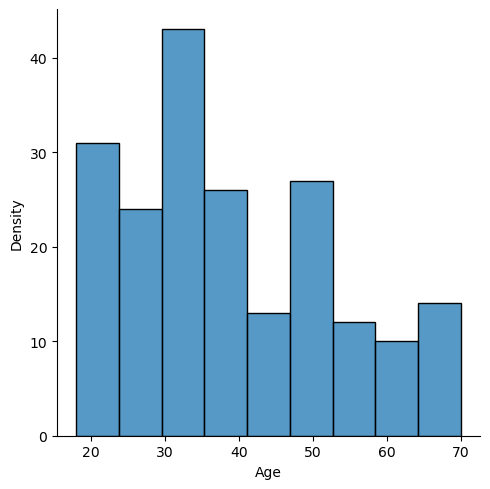

In [13]:
plt.figure(figsize=(8,4))
sns.displot(df.Age)
plt.xlabel("Age")
plt.ylabel("Density")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

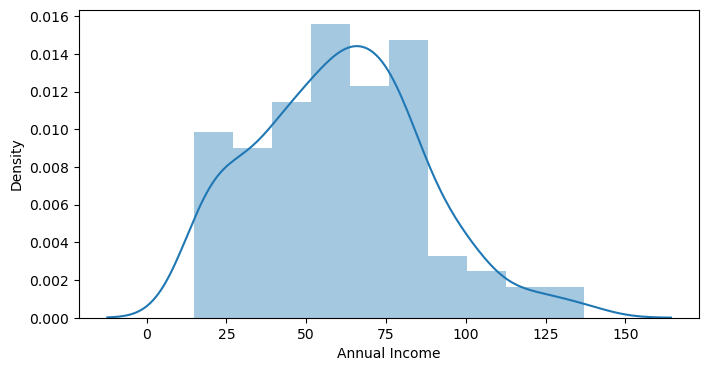

In [19]:
plt.figure(figsize=(8,4))
sns.distplot(df["Annual Income (k$)"])
plt.xlabel("Annual Income")
plt.ylabel("Density")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

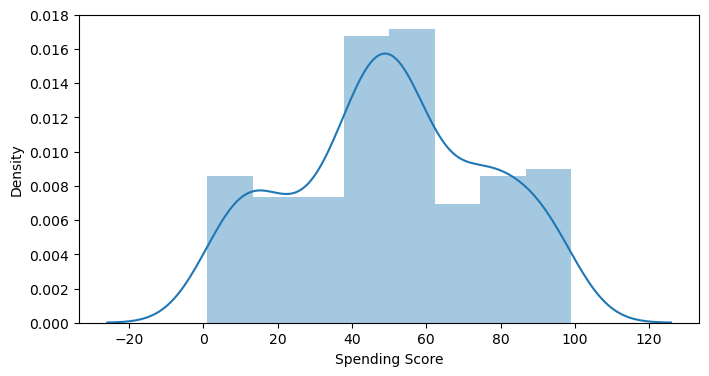

In [21]:
plt.figure(figsize=(8,4))
sns.distplot(df["Spending Score (1-100)"])
plt.xlabel("Spending Score")
plt.ylabel("Density")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

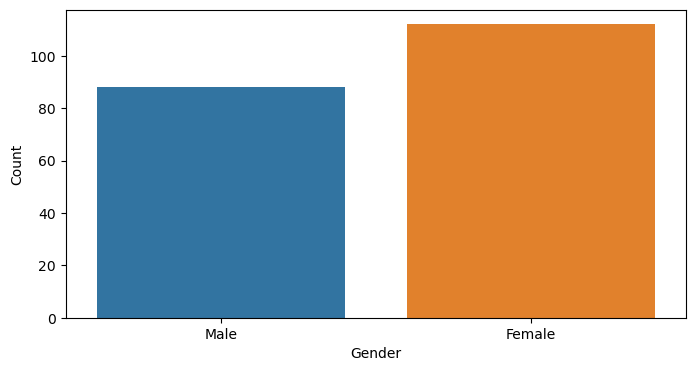

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(df.Gender)
plt.xlabel("Gender")
plt.ylabel("Count")


Text(0, 0.5, 'Annual Income (k$)')

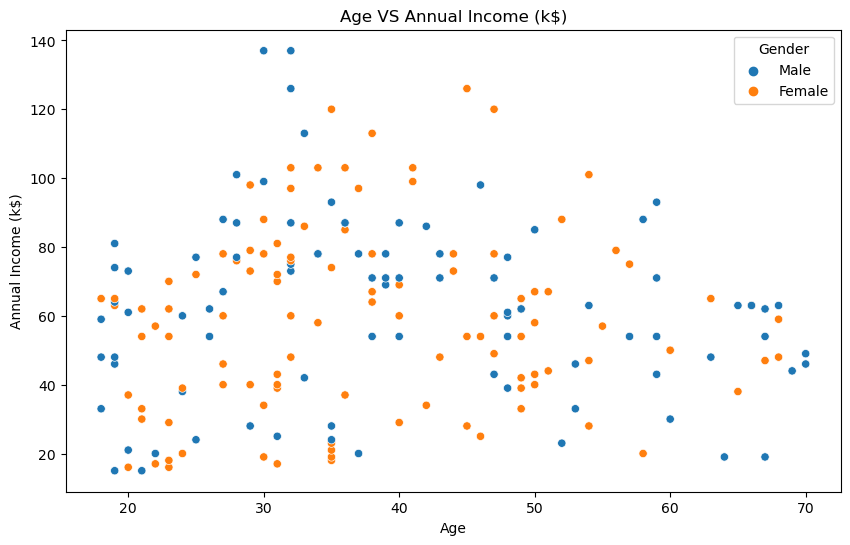

In [24]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)",hue="Gender")
plt.title("Age VS Annual Income (k$)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

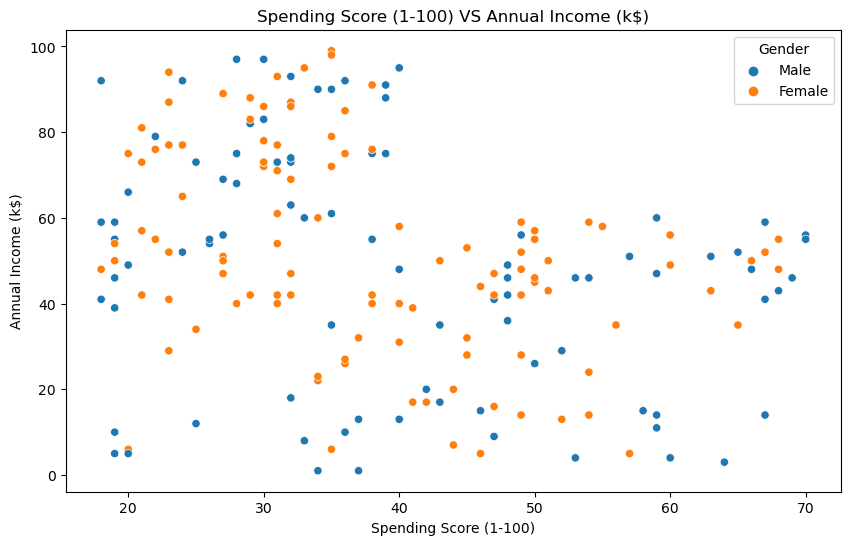

In [25]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="Age", y= "Spending Score (1-100)",hue="Gender")
plt.title("Spending Score (1-100) VS Annual Income (k$)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Customers')

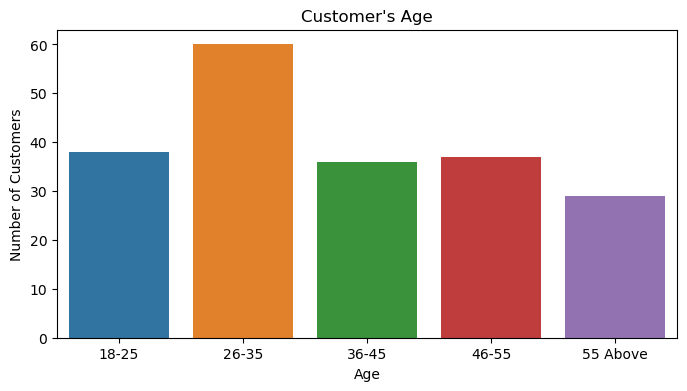

In [31]:
Age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
Age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
Age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
Age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
Age_55_Above = df.Age[(df.Age>=56)]

x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(8,4))
sns.barplot(x,y)
plt.title("Customer's Age")

plt.xlabel("Age")
plt.ylabel("Number of Customers")



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Customer')

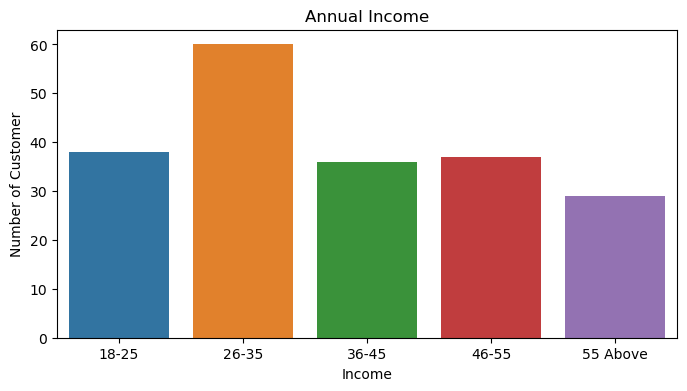

In [32]:
ainc0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ainc31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ainc61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ainc91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ainc121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ainc0_30.values), len(ainc31_60.values), len(ainc61_90.values), len(ainc91_120.values), len(ainc121_150.values)]

plt.figure(figsize=(8,4))
sns.barplot(x,y)
plt.title("Annual Income")

plt.xlabel("Income")
plt.ylabel("Number of Customer")

# Model-Building with Rescaling

In [36]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
df_scaled_fit = scaler.fit_transform(df_scaled)
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [37]:
var_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

In [39]:

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)
kmeans.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

# Clustering

Text(0, 0.5, 'Sum of Squared Distance')

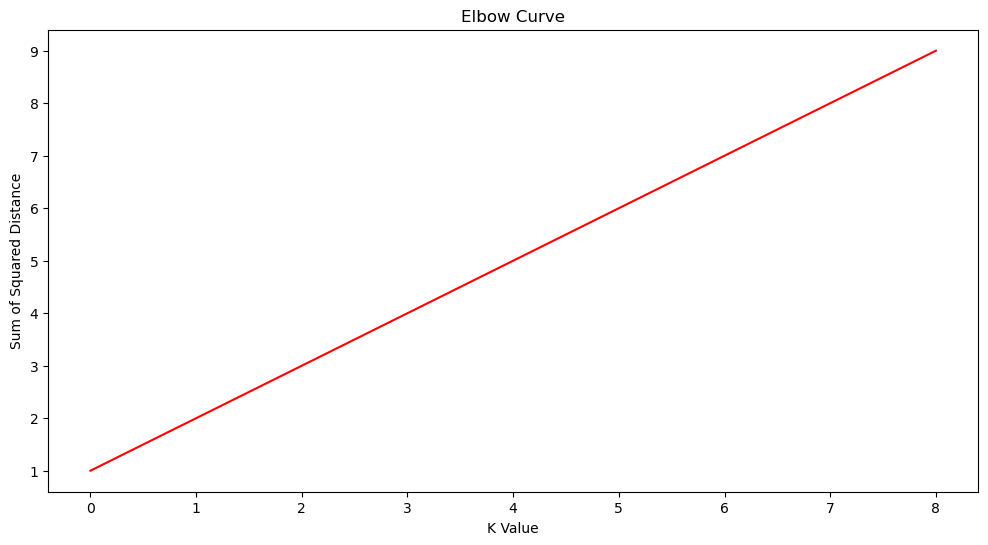

In [44]:
plt.figure(figsize=(12,6))

plt.plot(range(1,10), color="red")
plt.title("Elbow Curve")
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distance")

In [45]:
kmeans = KMeans(n_clusters=5, max_iter=30)
kmeans.fit(var_list)

KMeans(max_iter=30, n_clusters=5)

In [49]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [48]:
df["Label"] = kmeans.labels_

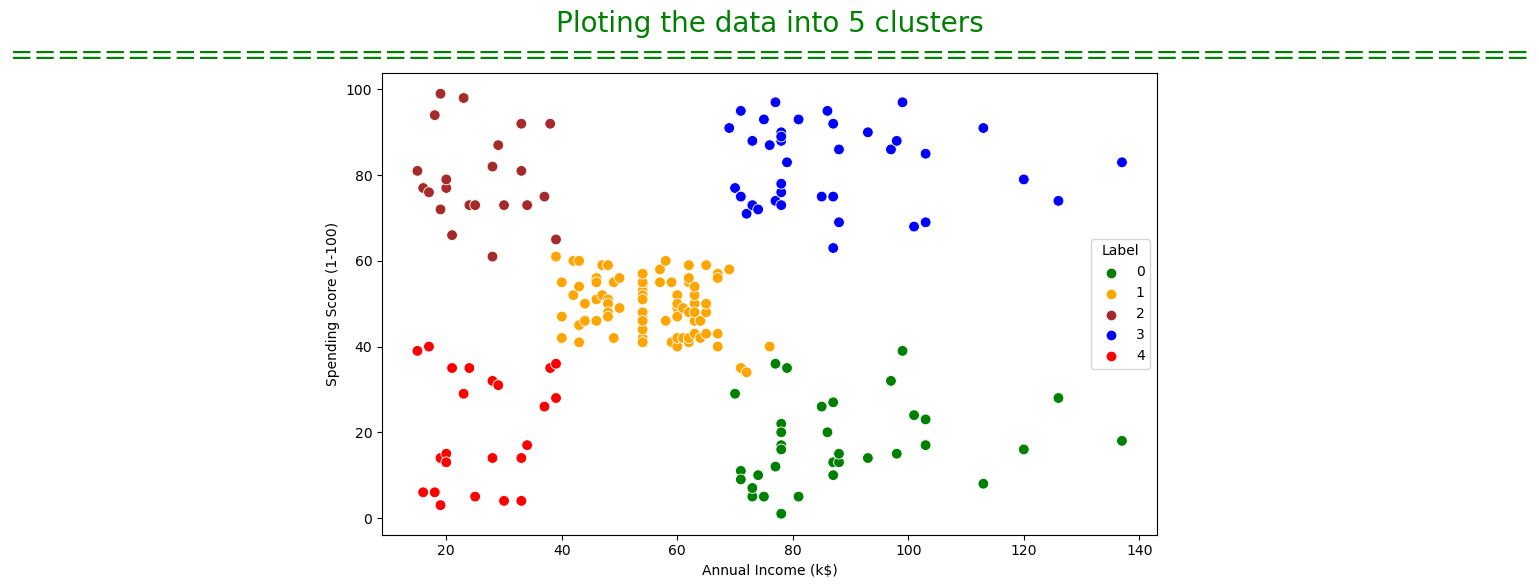

In [50]:
plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

In [52]:
var_list_1 = df_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]
var_list_1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Model Fitting

In [57]:
kmeans1= KMeans(n_clusters=5, max_iter=50)
kmeans1.fit(var_list_1)
KMeans(max_iter=50, n_clusters=5)          
kmeans1.labels_

array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 4, 3, 3, 3, 1, 1, 1, 1, 3, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [59]:
ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)
    
    ssd.append(kmeans1.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of Squared Distance')

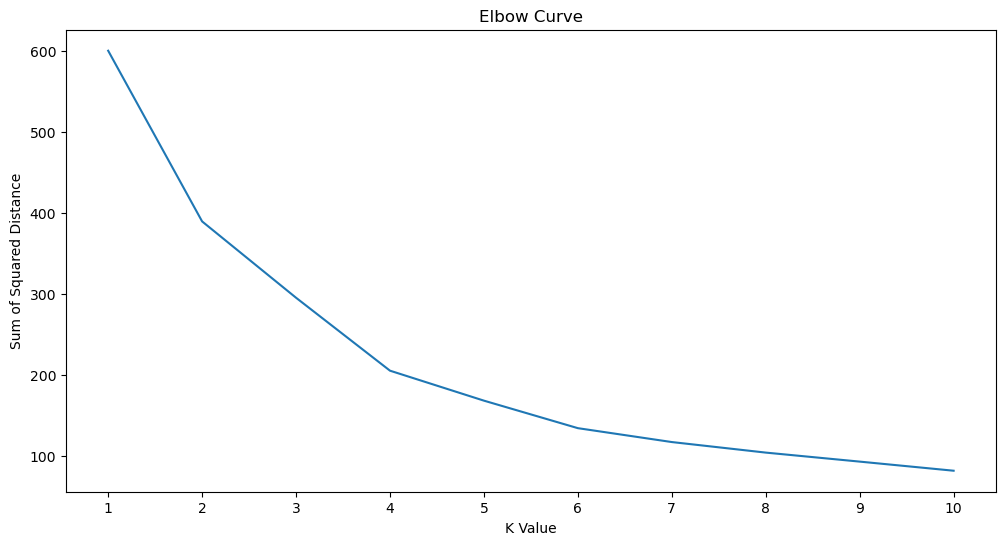

In [60]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd)
plt.title("Elbow Curve")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Sum of Squared Distance")


Text(0.5, 0.5, 'Annual Income (k$)')

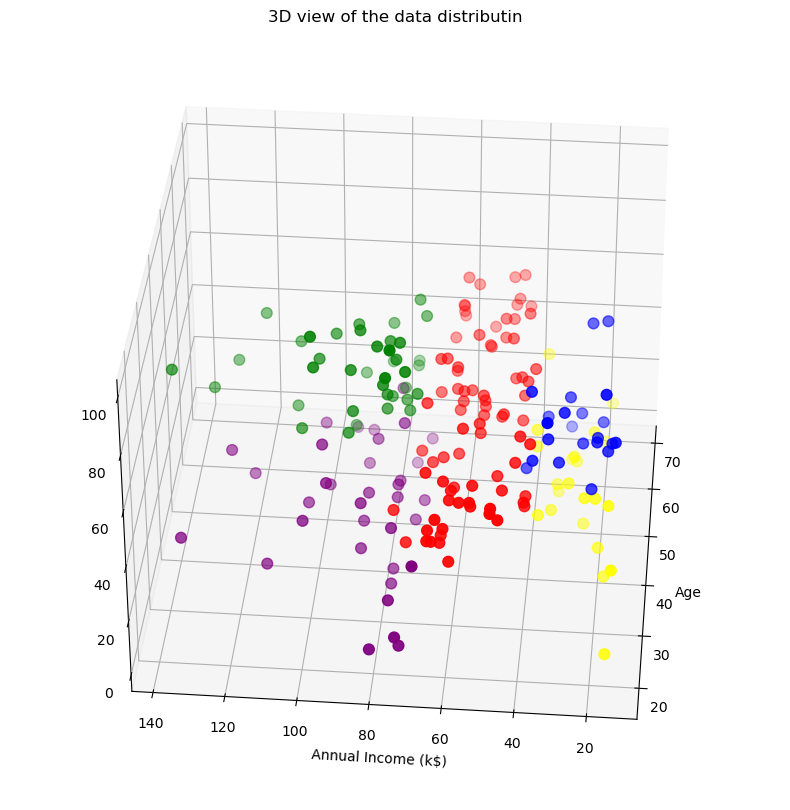

In [61]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Label == 0], df["Annual Income (k$)"][df.Label == 0], df["Spending Score (1-100)"][df.Label == 0], c='purple', s=60)
ax.scatter(df.Age[df.Label == 1], df["Annual Income (k$)"][df.Label == 1], df["Spending Score (1-100)"][df.Label == 1], c='red', s=60)
ax.scatter(df.Age[df.Label == 2], df["Annual Income (k$)"][df.Label == 2], df["Spending Score (1-100)"][df.Label == 2], c='blue', s=60)
ax.scatter(df.Age[df.Label == 3], df["Annual Income (k$)"][df.Label == 3], df["Spending Score (1-100)"][df.Label == 3], c='green', s=60)
ax.scatter(df.Age[df.Label == 4], df["Annual Income (k$)"][df.Label == 4], df["Spending Score (1-100)"][df.Label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.title("3D view of the data distributin")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")